In [19]:
from DLtools.Data import instant_data,check_specific_col,station_sel,del_less_col,intersection
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def scope_data(data):
    global start_p,stop_p
    data = data[start_p:stop_p]
    # data = del_less_col(data)
    return data

In [20]:
st,mode = 'CPY012','day'
target,start_p,stop_p,_ = station_sel(st,mode)
##########################################
loading = instant_data()
df_r = scope_data(loading.df_r)
df_w = scope_data(loading.df_w)
df_wet = scope_data(loading.df_wet)
df_dam = scope_data(loading.df_d)

df_solar = df_wet[check_specific_col(df_wet,'solar')]
df_rain1h = df_wet[check_specific_col(df_wet,'rain1h')]
df_temp = df_wet[check_specific_col(df_wet,'temp')]
df_press = df_wet[check_specific_col(df_wet,'press')]

<AxesSubplot:xlabel='date'>

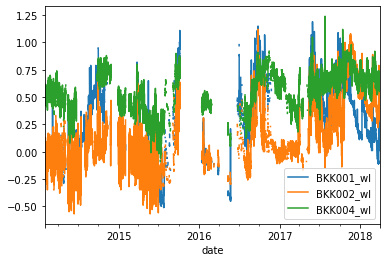

In [9]:
df_w.iloc[:,:3].plot()

In [10]:
df_rainST = pd.read_csv(f'/home/song/Public/Song/Work/Thesis/data/hii-telemetering-batch-data-master/station_metadata-rain.csv')
df_waterST = pd.read_csv(f'/home/song/Public/Song/Work/Thesis/data/hii-telemetering-batch-data-master/station_metadata-water-level.csv')
df_weatherST = pd.read_csv(f'/home/song/Public/Song/Work/Thesis/data/hii-telemetering-weather-data-master/station_metadata.csv')

In [11]:
def clean_list(data,df_st,sel_word):
    data_col = list(data.columns)
    data_col = [i.split("_") for i in data_col]
    _col =list()
    for i in data_col:
        if i[1]==sel_word : _col.append(i[0])
    dis_loc = intersection(_col,list(df_st['code']))
    df_st = df_st.loc[df_st['code'].isin(dis_loc)]
    return df_st

<AxesSubplot:xlabel='date'>

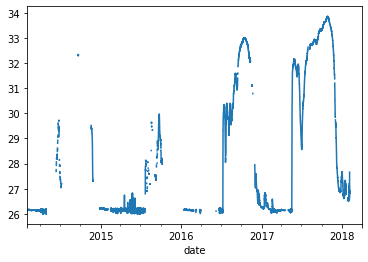

In [12]:
col='YOM009'
df_w[col+'_wl'].plot()
# station = df_waterST.loc[df_waterST['code']==col]
# thr = station['ground_level']
# thr = float(thr)
# df_w.loc[(df_w[col+'_wl'] < thr),col+'_wl'] = np.NaN


<AxesSubplot:xlabel='date'>

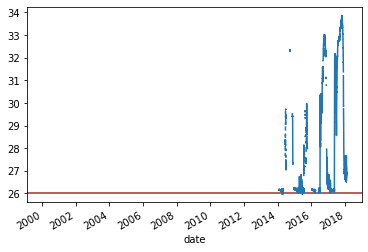

In [13]:
col='YOM009'
station = df_waterST.loc[df_waterST['code']==col]
thr = station['ground_level']
plt.axhline(y=station['ground_level'].values,color='brown')
df_w[col+'_wl'].plot()

# Outliner

In [37]:
for i in range(int(df_w.shape[1]/10)+1):
    ax =sns.boxplot(x="variable", y="value", data=pd.melt(df_w.iloc[:,i*10:i+10]))
    plt.setp(ax.get_xticklabels(), rotation=45)

ValueError: min() arg is an empty sequence

In [36]:
for i in range(int(df_w.shape[1]/10)+1):
    print(i*10,i*10+10)

0 10
10 20
20 30
30 40
40 50
50 60
60 70
70 80
80 90
90 100
100 110


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

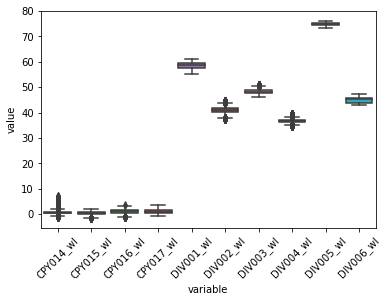

In [42]:
ax =sns.boxplot(x="variable", y="value", data=pd.melt(df_w.iloc[:,30:40]))
plt.setp(ax.get_xticklabels(), rotation=45)

In [44]:
cut = pd.cut(df_w.values, [0, 20, 40, 60, 80, 100])
cut
# boxdf = df.groupby(cut) \
#     .apply(lambda df: df.combined_delta.reset_index(drop=True)) \
#     .unstack(0)

# sns.boxplot(data=boxdf);

ValueError: Input array must be 1 dimensional